<a href="https://www.kaggle.com/code/hikmatullahmohammadi/ps-s3-ep2-modeling-eda?scriptVersionId=116118219" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id='0'></a>
# Playground Series - Season 3, Episode 2 (+EDA)

# Easy Navigation

- [1- Problem Statement & Dataset Description](#1)
- [2- Data Exploration](#2)
- [3- Explanatory Data Analysis (EDA)](#3)
    - [3.1- Looking at features individually](#3-1)
    - [3.2- See the relationships among features [and the target variable]](#3-2)
- [4- Data preprocessing](#4)
- [5- Modeling](#5)
    - [5.1- Model Construction](#5-1)
    - [5.2- Model Utilization & Submission](#5-2)

In [75]:
# import required libraies/dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from warnings import simplefilter
simplefilter('ignore')

<a id='1'></a>
# 1- Problem Statement & Dataset Description

The following is directly copied from the descriptoin tab of the [original dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset), by [@fedesoriano](https://www.kaggle.com/fedesoriano), from which the dataset for this competition has been created.<br>

"""start of quote<br>
**Context:**<br>
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.<br>
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.<br>

**Attribute Information**:<br>
1) id: unique identifier<br>
2) gender: "Male", "Female" or "Other"<br>
3) age: age of the patient<br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
6) ever_married: "No" or "Yes"<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
8) Residence_type: "Rural" or "Urban"<br>
9) avg_glucose_level: average glucose level in blood<br>
10) bmi: body mass index<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
12) stroke: 1 if the patient had a stroke or 0 if not<br>

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient<br>
"""end of quote<br>

**Our objective** is to build a ml model to predict the probability of a person having a stroke

<a id='2'></a>
# 2- Data Exploration

In [76]:
# load datasets
df_train = pd.read_csv('/kaggle/input/playground-series-s3e2/train.csv', index_col=0)
df_test = pd.read_csv('/kaggle/input/playground-series-s3e2/test.csv', index_col=0)

In [77]:
df_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [78]:
print(f'The training set contains {df_train.shape[0]} rows and {df_train.shape[1]} columns.')

The training set contains 15304 rows and 11 columns.


In [79]:
# let's display an overview of the data types to see if they are as expected
df_train.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [80]:
# extract numeric and categorical features
numeric_features = df_train.select_dtypes(exclude='object').columns
categorical_features = df_train.select_dtypes(include='object').columns

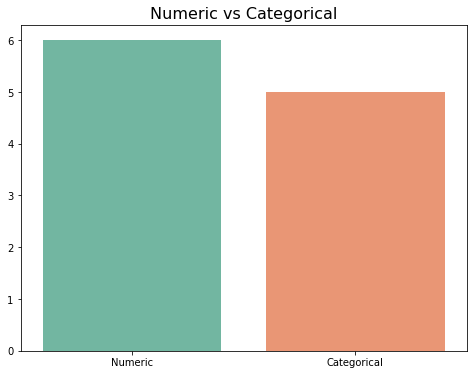

In [81]:
# visualize the ratio of numeric and categorical features
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=['Numeric', 'Categorical'], y=[numeric_features.shape[0], categorical_features.shape[0]])
ax.set_title('Numeric vs Categorical', fontdict={'fontsize': 16})
plt.show()

There are **6** numeric and **5** categorical features

In [82]:
df_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [83]:
# Missing values
df_train.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

There are not missing values

In [84]:
# let's have a statistical view over the dataset, and look for outliers
df_train.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


There does seem to be any extreme values in the dataset.

---

<a id='3'></a>
# 3- Explanatory Data Analysis (EDA)

In this section, we will first go through all features one by one, and then we will see the relationships among features themselves and the target variable

<a id='3-1'></a>
## 3.1- Looking at features individually

**Let's look at *Gender* feature**

In [85]:
# gender
df_train['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

There are **3** values for gender which are *Male*, *Female* and *other*.

In [86]:
# gender count
pd.crosstab(
    index=df_train['gender'],
    columns='Counts'
).T

gender,Female,Male,Other
col_0,,,
Counts,9446,5857,1


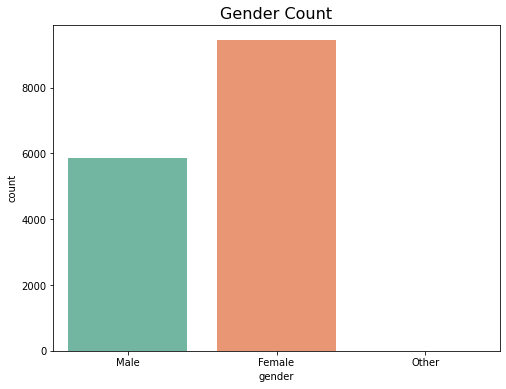

In [87]:
# gender count visualization
plt.figure(figsize=(8, 6))

ax = sns.countplot(df_train['gender'])
ax.set_title('Gender Count', fontdict={'fontsize': 16})
plt.show()

Most of observations are Female following by Male, and there is only one observation having a gender of *Other*.

**Let's look at *Age* features**

In [88]:
# age
df_train['age'].describe()

count    15304.000000
mean        41.417708
std         21.444673
min          0.080000
25%         26.000000
50%         43.000000
75%         57.000000
max         82.000000
Name: age, dtype: float64

The minimum age is **0.08**, and the maximum age is **82** years.

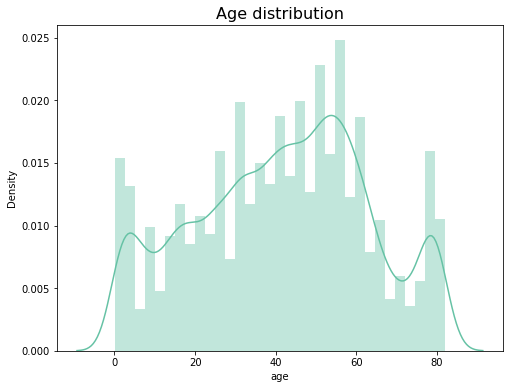

In [89]:
# Age distribution visualization
plt.figure(figsize=(8, 6))

ax = sns.distplot(df_train['age'])
ax.set_title('Age distribution', fontdict={'fontsize': 16})
plt.show()

A major number of observations are between their 40's and 60's. Also, the *Age* distribution does not show much bias.

**Let's look at *hypertension* feature**

In [90]:
df_train['hypertension'].unique()

array([0, 1])

There are **2** values corresponding to *hypertension*, 0 & 1, with 0 being negative and 1 being a positive case.

In [91]:
# hypertension count
pd.crosstab(
    index=df_train['hypertension'],
    columns='Counts'
).T

hypertension,0,1
col_0,,
Counts,14543,761


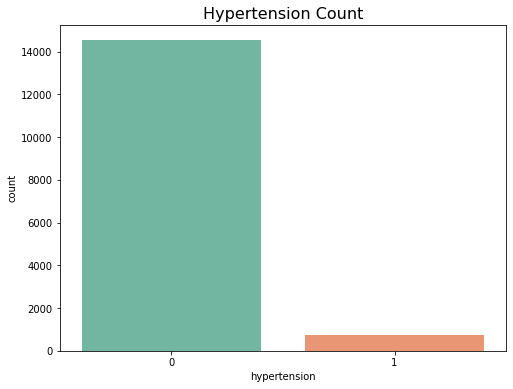

In [92]:
# hypertension count visualization
plt.figure(figsize=(8, 6))

ax = sns.countplot(df_train['hypertension'])
ax.set_title('Hypertension Count', fontdict={'fontsize': 16})
plt.show()

The number of obversations not having hypertension (14543) is much higher than that of observations with a positive hypertension (761).

**Let's look at *heart_disease* feature**

In [93]:
df_train['heart_disease'].unique()

array([0, 1])

There are 2 values corresponding to *heart_disease*, 0 & 1, with 0 being negative and 1 being a positive case.

In [94]:
# heart_disease count
pd.crosstab(
    index=df_train['heart_disease'],
    columns='Counts'
).T

heart_disease,0,1
col_0,,
Counts,14947,357


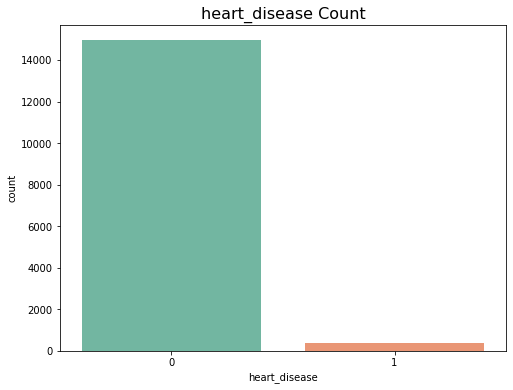

In [95]:
# heart_disease count visualization
plt.figure(figsize=(8, 6))

ax = sns.countplot(df_train['heart_disease'])
ax.set_title('heart_disease Count', fontdict={'fontsize': 16})
plt.show()

The number of obversations not having heart disease (14947) is much higher than that of observations with a positive hypertension (357).

**Let's look at *ever_married* feature**

In [96]:
df_train['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

There are 2 values corresponding to *ever_married*, *Yes* & *No*, with *No* being negative and *Yes* being positive.

In [97]:
# ever_married count
pd.crosstab(
    index=df_train['ever_married'],
    columns='Counts'
).T


ever_married,No,Yes
col_0,,
Counts,4919,10385


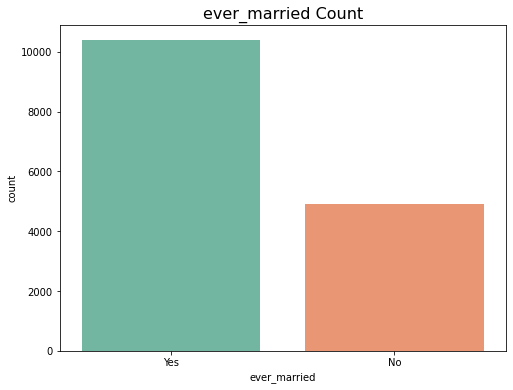

In [98]:
# ever_married count visualization
plt.figure(figsize=(8, 6))

ax = sns.countplot(df_train['ever_married'])
ax.set_title('ever_married Count', fontdict={'fontsize': 16})
plt.show()

The number of obversations who have evered married (10385) is much higher than that of observations who have not married (4919).

**Let's look at *work_type* feature**

In [99]:
df_train['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

There are 4 values corresponding to *work_type*, and they are pretty self-explaining

In [100]:
# work_type count
pd.crosstab(
    index=df_train['work_type'],
    columns='Counts'
).T

work_type,Govt_job,Never_worked,Private,Self-employed,children
col_0,,,,,
Counts,1533,42,9752,1939,2038


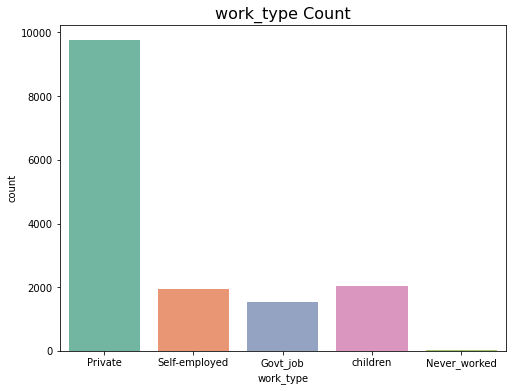

In [101]:
# work_type count visualization
plt.figure(figsize=(8, 6))

sns.set_palette('Set2')
ax = sns.countplot(df_train['work_type'])
ax.set_title('work_type Count', fontdict={'fontsize': 16})
plt.show()

The above charts and figures are pretty self-explaining and vivid.

**Let's look at *Residence_type* feature**

In [102]:
df_train['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

There are 2 values corresponding to *Residence_type*, *Urban* & *Rural*

In [103]:
# Residence_type count
pd.crosstab(
    index=df_train['Residence_type'],
    columns='Counts'
).T

Residence_type,Rural,Urban
col_0,,
Counts,7664,7640


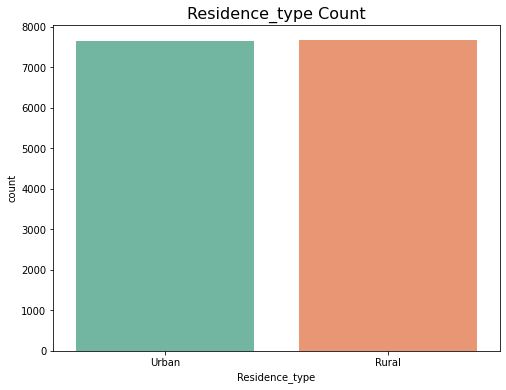

In [104]:
# Residence_type count visualization
plt.figure(figsize=(8, 6))

ax = sns.countplot(df_train['Residence_type'])
ax.set_title('Residence_type Count', fontdict={'fontsize': 16})
plt.show()

*Urban* and *Rural* values of *Residence_type* are distributed almost equally, which is state-of-the-art in ML.

**Let's look at *avg_glucose_level* feature**

In [105]:
# avg_glucose_level
df_train['avg_glucose_level'].describe()

count    15304.000000
mean        89.039853
std         25.476102
min         55.220000
25%         74.900000
50%         85.120000
75%         96.980000
max        267.600000
Name: avg_glucose_level, dtype: float64

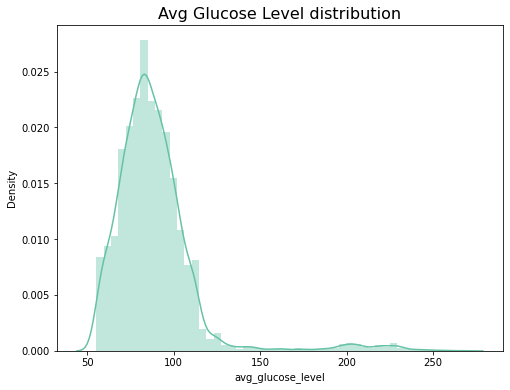

In [106]:
# avg_glucose_level distribution visualization
plt.figure(figsize=(8, 6))

ax = sns.distplot(df_train['avg_glucose_level'])
ax.set_title('Avg Glucose Level distribution', fontdict={'fontsize': 16})
plt.show()

The *avg_glucose_level* is not distributed equally; the majority of observations have an average *Glucose level* of 60-120, but very few of them have that of 120-250.

**Let's look at *bmi* feature**

In [107]:
# bmi
df_train['bmi'].describe()

count    15304.000000
mean        28.112721
std          6.722315
min         10.300000
25%         23.500000
50%         27.600000
75%         32.000000
max         80.100000
Name: bmi, dtype: float64

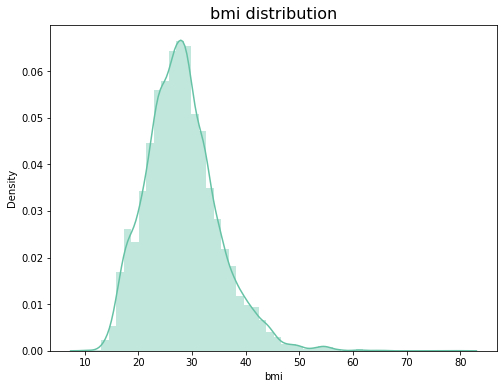

In [108]:
# bmi distribution visualization
plt.figure(figsize=(8, 6))

ax = sns.distplot(df_train['bmi'])
ax.set_title('bmi distribution', fontdict={'fontsize': 16})
plt.show()

The *bmi* is not distributed equally; the majority of observations have a *bmi* of 25-35, but very few of them have that of 50-80, which may be troublesome.

**Let's look at *smoking_status* feature**

In [109]:
df_train['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

There are 4 values corresponding to *smoking_status*, 'never smoked', 'formerly smoked', 'Unknown' and 'smokes'.

In [110]:
# smoking_status count
pd.crosstab(
    index=df_train['smoking_status'],
    columns='Counts'
).T

smoking_status,Unknown,formerly smoked,never smoked,smokes
col_0,,,,
Counts,4543,2337,6281,2143


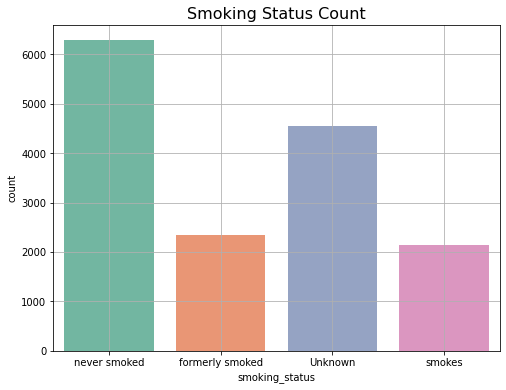

In [111]:
# smoking_status count visualization
plt.figure(figsize=(8, 6))

sns.set_palette('Set2')
ax = sns.countplot(df_train['smoking_status'])
ax.set_title('Smoking Status Count', fontdict={'fontsize': 16})
plt.grid(True)
plt.show()

**Let's have a look at the target variable**

In [112]:
df_train['stroke'].unique()

array([0, 1])

1 = Positive case, 0 = Negative case

In [113]:
# target variable count
pd.crosstab(
    index=df_train['stroke'],
    columns='Counts'
).T

stroke,0,1
col_0,,
Counts,14672,632


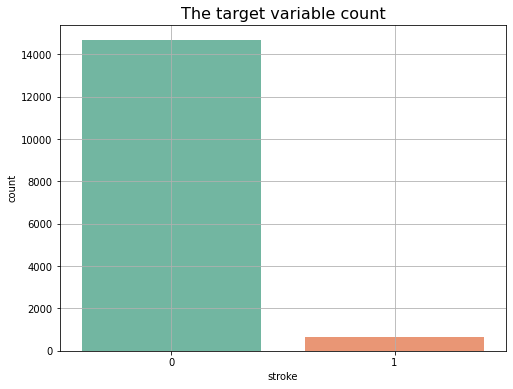

In [114]:
# Target variable count visualization
plt.figure(figsize=(8, 6))

sns.set_palette('Set2')
ax = sns.countplot(df_train['stroke'])
ax.set_title('The target variable count', fontdict={'fontsize': 16})
plt.grid(True)
plt.show()

The target variable shows extreme **bias** which may effect an ml model negatively. The number of **1's (632)** is much lower than the number of **0's (14672).**

---

<a id='3-2'></a>
## 3.2- See the relationships among features [and the target variable]

In this section we will see how each feature can effect the target variable. This will help us to understand the importance of features, and also to see how specific values in a column are more impressive.

**We will first examine the effects of categorical features on the target variable, and then, we will through numeric features.**

**1- Gender**

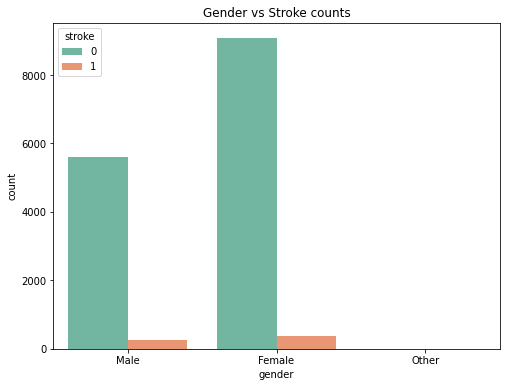

In [115]:
# How gender effects the target variable
plt.figure(figsize=(8, 6))

sns.set_palette('Set2')

ax = sns.countplot(df_train['gender'], hue=df_train['stroke'])
ax.set_title('Gender vs Stroke counts')
plt.show()

In [116]:
# gender vs stroke
pd.crosstab(
    index=df_train['gender'],
    columns=df_train['stroke'],
    margins=True,
    normalize='index',
)

stroke,0,1
gender,,
Female,0.961042,0.038958
Male,0.954926,0.045074
Other,1.000000,0.000000
All,0.958704,0.041296


As we can see from the above chart and figure, gender alone does have much effects of the stroke value. **That is, 96% females and 95% of males are with a stroke value of 0.**

**2- Ever Married**

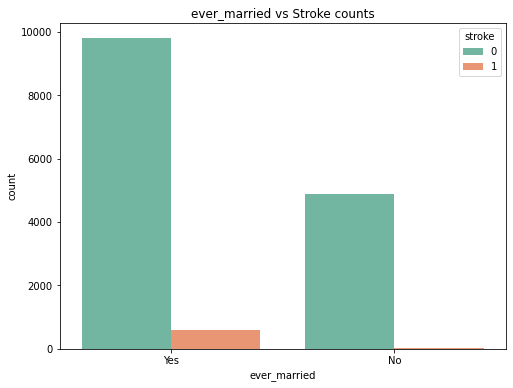

In [117]:
# How ever_married feature effects the target variable
plt.figure(figsize=(8, 6))

sns.set_palette('Set2')

ax = sns.countplot(df_train['ever_married'], hue=df_train['stroke'])
ax.set_title('ever_married vs Stroke counts')
plt.show()

In [118]:
# Ever Married vs stroke
pd.crosstab(
    index=df_train['ever_married'],
    columns=df_train['stroke'],
    margins=True,
    normalize='index',
)

stroke,0,1
ever_married,,
No,0.991665,0.008335
Yes,0.943091,0.056909
All,0.958704,0.041296


Those who have ever married have a higher chance of having a stroke than those who haven't ever married;

**3- Work Type**

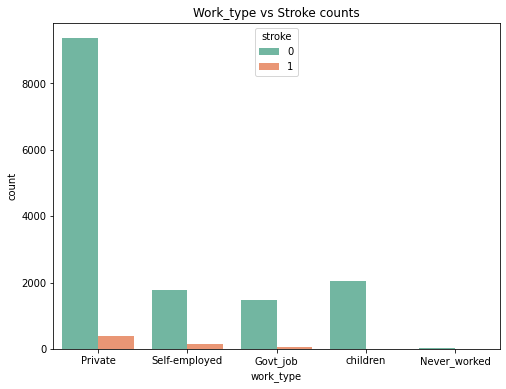

In [119]:
# How work_type feature effects the target variable
plt.figure(figsize=(8, 6))

sns.set_palette('Set2')

ax = sns.countplot(df_train['work_type'], hue=df_train['stroke'])
ax.set_title('Work_type vs Stroke counts')
plt.show()

In [120]:
# Work Type vs stroke
pd.crosstab(
    index=df_train['work_type'],
    columns=df_train['stroke'],
    margins=True,
    normalize='index',
)

stroke,0,1
work_type,,
Govt_job,0.954990,0.045010
Never_worked,1.000000,0.000000
Private,0.958573,0.041427
Self-employed,0.918515,0.081485
children,0.999509,0.000491
All,0.958704,0.041296


Those who have never worked has the highest safety probability for having a stroke, wherease those who are self-employed has the highest risk probability for having a stroke. This feature has a higher effect on the target variable.

**4- Residence_type**

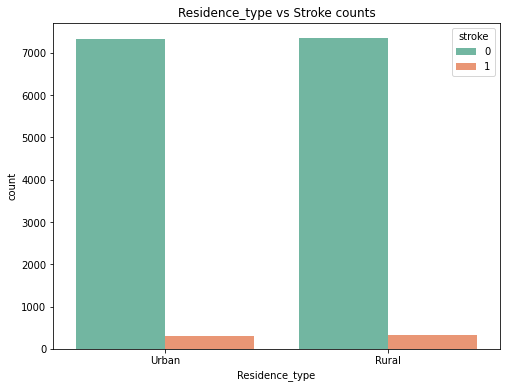

In [121]:
# How Residence_type feature effects the target variable
plt.figure(figsize=(8, 6))

sns.set_palette('Set2')

ax = sns.countplot(df_train['Residence_type'], hue=df_train['stroke'])
ax.set_title('Residence_type vs Stroke counts')
plt.show()

In [122]:
# Residence_type vs stroke
pd.crosstab(
    index=df_train['Residence_type'],
    columns=df_train['stroke'],
    margins=True,
    normalize='index',
)

stroke,0,1
Residence_type,,
Rural,0.958638,0.041362
Urban,0.958770,0.041230
All,0.958704,0.041296


We may consider removing this feature, Residence_type, since its values' impacts to the target variable are the same. 95.9% of both values are having a stroke value of 0.

**5- Smoking Status**

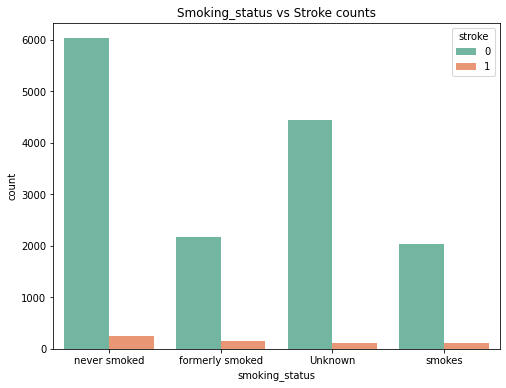

In [123]:
# How smoking_status feature effects the target variable
plt.figure(figsize=(8, 6))

sns.set_palette('Set2')

ax = sns.countplot(df_train['smoking_status'], hue=df_train['stroke'])
ax.set_title('Smoking_status vs Stroke counts')
plt.show()

In [124]:
# smoking_status vs stroke
pd.crosstab(
    index=df_train['smoking_status'],
    columns=df_train['stroke'],
    margins=True,
    normalize='index',
)

stroke,0,1
smoking_status,,
Unknown,0.976227,0.023773
formerly smoked,0.931964,0.068036
never smoked,0.959083,0.040917
smokes,0.949603,0.050397
All,0.958704,0.041296


*Unknown* & *never smoked* values have lower chance of having a stroke wherease *formerly smoked* and *smokes* values have higher chance of having a stroke. Those who formerly smoked has the highest change of having a stroke.

**6- Hypertension**

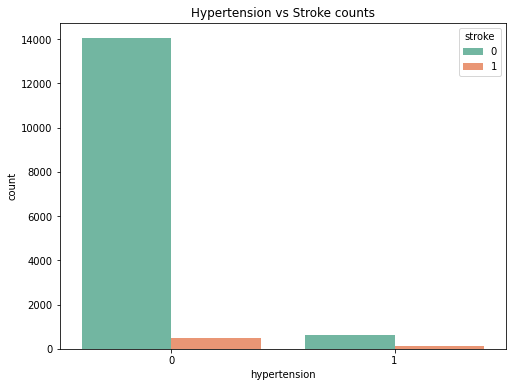

In [125]:
# How hypertension feature effects the target variable
plt.figure(figsize=(8, 6))

sns.set_palette('Set2')

ax = sns.countplot(df_train['hypertension'], hue=df_train['stroke'])
ax.set_title('Hypertension vs Stroke counts')
plt.show()

In [126]:
# Hypertension vs stroke
pd.crosstab(
    index=df_train['hypertension'],
    columns=df_train['stroke'],
    margins=True,
    normalize='index',
)

stroke,0,1
hypertension,,
0,0.965344,0.034656
1,0.831800,0.168200
All,0.958704,0.041296


Those who are suffering from *hypertension* has a higher chance of having a stroke than those who don't have *hypertension*.

**7- Heart Disease**

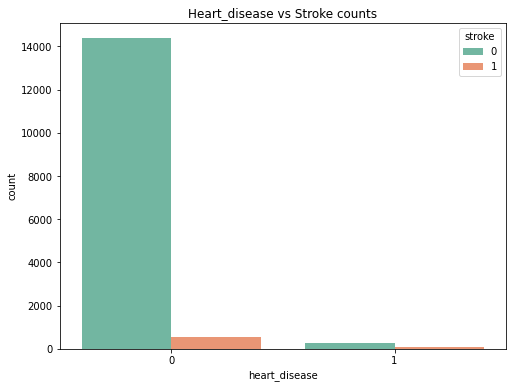

In [127]:
# How heart_disease feature effects the target variable
plt.figure(figsize=(8, 6))

sns.set_palette('Set2')

ax = sns.countplot(df_train['heart_disease'], hue=df_train['stroke'])
ax.set_title('Heart_disease vs Stroke counts')
plt.show()

In [128]:
# heart_disease vs stroke
pd.crosstab(
    index=df_train['heart_disease'],
    columns=df_train['stroke'],
    margins=True,
    normalize='index',
)

stroke,0,1
heart_disease,,
0,0.962133,0.037867
1,0.815126,0.184874
All,0.958704,0.041296


Those who are suffering from *heart disease* has a higher chance of having a stroke than those who don't have *heart disease*.

---

**Now let's see the effects of different numeric features on the target variable**

**1- Age**

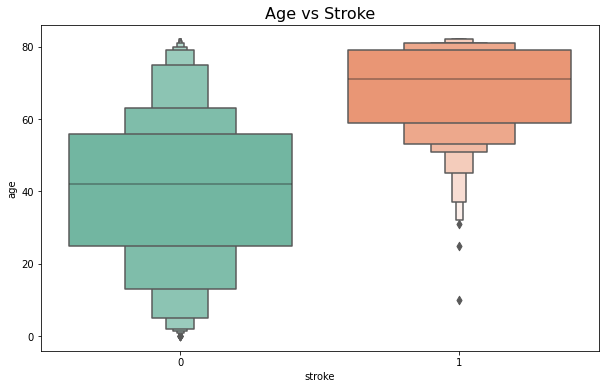

In [129]:
# How age feature effects the target variable
plt.figure(figsize=(10, 6))

sns.set_palette('Set2')

ax = sns.boxenplot(data=df_train, x='stroke', y='age')
ax.set_title('Age vs Stroke', fontdict={'fontsize': 16})
plt.show()

We can vividly see that most of observations having a stroke are above 60 wherease most of observations with no stroke is under 60. This feature can be a good predictor.

**2- Ave Clucose level**

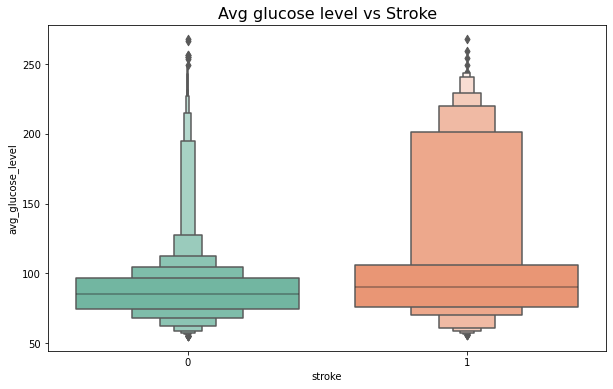

In [130]:
# How avg_glucose_level feature effects the target variable
plt.figure(figsize=(10, 6))

sns.set_palette('Set2')

ax = sns.boxenplot(data=df_train, x='stroke', y='avg_glucose_level')
ax.set_title('Avg glucose level vs Stroke', fontdict={'fontsize': 16})
plt.show()

Again, the higher the glucose level, the higher the chance of having a stroke.

**3- BMI**

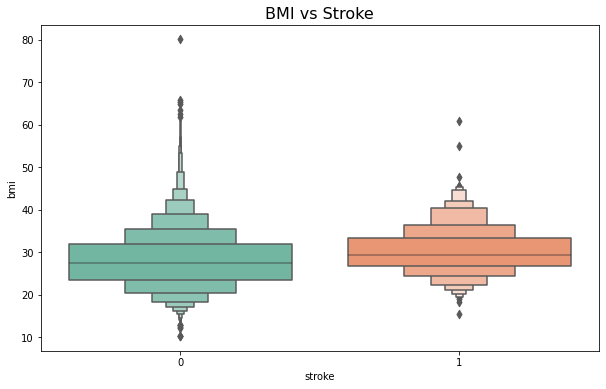

In [131]:
# How bmi feature effects the target variable
plt.figure(figsize=(10, 6))

sns.set_palette('Set2')

ax = sns.boxenplot(data=df_train, x='stroke', y='bmi')
ax.set_title('BMI vs Stroke', fontdict={'fontsize': 16})
plt.show()

Though many of observations with a negative stroke case have a lower bmi, it does seem to have a huge impact on the target variable because there are some observations who have too high bmi but still have a negative stroke case.

---

<a id='4'></a>
# 4- Data Preprocessing

In this section we will preprocess the dataset in order to get it ready for modeling. We will first combine the training set with the **original dataset** and the test set, and then do the following:
- 1. We will remove *Residence_type* & *bmi* feature since they have almost no impact on the target variable, and getting rid of the noise will help us with our model's performance.
- 2. we will encode all categorical variables to numbers so as to fit to algorithms we will use.
- 3. we will  normalize/scale some features of which values are not at the same scale with others. Here we will use MinMax algorithm to shrink the values between 0 and 1

---

In [132]:
# load the original dataset and combine it with the training set
df_orig = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv', index_col=0)
df_train = df_train.append(df_orig)
df_train.shape

(20414, 11)

In [133]:
# let's combine the training and the test sets for consistancy purposes
df = df_train.append(df_test)

# reset id since the original dataset also begins with 0
df.index = df.reset_index().index

df.shape

(30618, 11)

---

In [134]:
# 1- remove 'Residence_type' and 'bmi' features
df.drop(['Residence_type', 'bmi'], axis=1, inplace=True)

In [135]:
# 2- encode categorical variables to numbers

# gender
df['gender'] = df['gender'].map({
    'Male': 0,
    'Female': 1,
    'Other': 2
}).astype('int')

# ever_married
df['ever_married'] = df['ever_married'].map({
    'Yes': 1,
    'No': 0
}).astype('int')

# work_type
df['work_type'] = df['work_type'].map({
    'Private':0,
    'Self-employed': 1,
    'Govt_job': 2,
    'children': 3,
    'Never_worked': 4
}).astype('int')

# smoking_status
df['smoking_status'] = df['smoking_status'].map({
    'never smoked' : 0,
    'formerly smoked': 1,
    'smokes': 2,
    'Unknown': 3
}).astype('int')

df.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
avg_glucose_level    float64
smoking_status         int64
stroke               float64
dtype: object

In [136]:
# 3- data normalization on numeric features (age & avg_glucose_level) using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['age', 'avg_glucose_level']] = scaler.fit_transform(df[['age', 'avg_glucose_level']])
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status,stroke
0,0,0.340820,0,0,1,0,0.112686,0,0.0
1,0,0.401855,0,0,1,0,0.107654,1,0.0
2,1,0.511719,0,0,1,0,0.221032,3,0.0
3,0,0.682617,0,0,1,0,0.045010,0,0.0
4,1,0.291992,0,0,0,0,0.084203,0,0.0


In [137]:
# seperate the training set and the test set from each other.
df_train = df.loc[:df_train.shape[0]-1]
df_test = df.loc[df_train.shape[0]:].iloc[:, :-1]

---

<a id='5'></a>
# 5- Modeling

In this section, we will first train a model and then use it to predict on the test set and submit the result.

<a id='5-1'></a>
## 5.1- Model Construction

In [138]:
# separate the features from the target variable
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]

Though the target variable in the dataset is a categorical variable, we will use it to train a regression model to get the probability.

In [139]:
from xgboost import XGBRFRegressor

model = XGBRFRegressor()
model.fit(X, y)
print('The model has been trained!')

The model has been trained!


<a id='5-2'></a>
## 5.2- Model Utilization & Submission

In [140]:
# predict the stroke values in the test set
preds = model.predict(df_test)

In [147]:
# scale the values between 0 and 1 (probability), since some datapoints may be < 0. or > 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
preds = scaler.fit_transform(preds.reshape(-1, 1))

In [148]:
# create a dataframe
submission = pd.DataFrame({
    'id': np.arange(15304, 25508),
    'stroke': preds.reshape(-1, )
})
submission

,id,stroke
0,15304,0.058311
1,15305,0.281434
2,15306,0.000127
3,15307,0.062436
4,15308,0.006876
...,...,...
10199,25503,0.000000
10200,25504,0.018595
10201,25505,0.000127
10202,25506,0.003557


In [149]:
# write to a file
submission.to_csv('./submission.csv', index=False)
print('Done...')

Done...


# Thank you :)
By: [Hikmatullah Mohammadi](https://www.kaggle.com/hikmatullahmohammadi) <br>

[Go to top](#0)